### Practical Task:
* Read the Iris dataset (Iris.csv) in a Jupyter notebook and name it iris_logistic_regression.ipynb.
* The dataset consists of three classes of irises. The objective is to create a classifier that will predict whether an iris belongs to the ‘Iris-setosa' class or not.
This means that we have two classes: ‘Iris-setosa' and not-‘Iris-setosa’ (which includes 'Iris-versicolour' and 'Iris-virginica').
    * Identify the independent variable x.
    * Encode the dependent variable y such that ‘Iris-setosa' is encoded as 0, and 'Iris-versicolour' and 'Iris-virginica' are both encoded as 1. (0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the not-‘Iris-setosa' class.)
    * Split the data into a training and test set.
    * Use sklearn’s logistic regression function to fit a model and make predictions on the test set.
    * Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels).
    * Analyse the confusion matrix and provide a prediction, in a comment, on whether the model is likely to have higher precision, higher recall, or similar precision and recall.
    * Write own code to calculate the accuracy, precision, and recall, and check whether the prediction was right.

* Completed (Optional) repeat the task and changed it so that only have all three categories ‘Iris-setosa', 'Iris-versicolour', and 'Iris-virginica' corresponding to the numeric values 0, 1, and 2 respectively; this will now be a three-class problem. Observed how this changes the confusion matrix.

In [564]:
import numpy as np
import pandas as pd
import sklearn
# Importing libraries

import seaborn as sns
import matplotlib.pyplot as plt
# Import libraries for visualisation and plotting

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
# Used sklearn specific library to load, scale and perform linear regression and create confusion matrix

%matplotlib inline
# Line of code to save and pan, as using Matplotlib to plot and render

In [565]:
df = pd.read_csv('Iris.csv')
df.head()
# Import the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [566]:
df.info()
# Show total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [567]:
df['Species'].unique()
# Check unique values in Species column.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [568]:
label_numbers = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 1
}
df['Species'] = df['Species'].map(label_numbers)
# Use manual scaling to label species individually.

In [569]:
print ('Top 5 records for reference check: \n', df.head(), '\n')
print ('Last 5 records for reference check: \n', df.tail())
# Show top 5 and last 5 observations.

Top 5 records for reference check: 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0 

Last 5 records for reference check: 
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145  146            6.7           3.0            5.2           2.3        1
146  147            6.3           2.5            5.0           1.9        1
147  148            6.5           3.0            5.2           2.0        1
148  149            6.2           3.4            5.4           2.3        1
149  150            5.9           3.0            5.1           1.8        1


<Axes: >

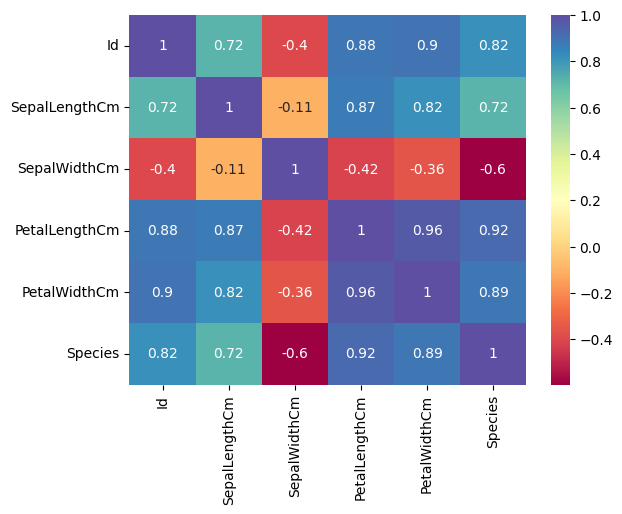

In [570]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
# Heatmap show correlation between variables.

In [571]:
X = df['PetalWidthCm']
y = df['Species']
# Assign correct independent and target variables to relevant axes
"""Due to inter-correlation of PetalLength to PetalWidth, chose to ignore PetalLength
    and picked PetalWidth as independent variable """

X.shape, y.shape
# Check shape of X and y.

((150,), (150,))

In [572]:
X = np.reshape(X, (-1, 1))
print('X: \n', X[0:9])
# Reshaped and print independent variable

X: 
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]]


In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.4, random_state=0)
# Split data into test and train dataset into 40% and 60%, due to this being a small dataset.

In [574]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
# Fit the model

LogisticRegression()

In [575]:
print('Intercept:', logr.intercept_)
print('Coefficient:', logr.coef_)
# Print intercept and coefficient.

Intercept: [-2.98643629]
Coefficient: [[3.83313296]]


In [576]:
y_pred = logr.predict(X_test)
y_pred
# Show prediction.

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Confusion Matrix: 
 [[16  0]
 [ 0 44]]


Text(0, 0.5, 'Actuals(Gold labels)')

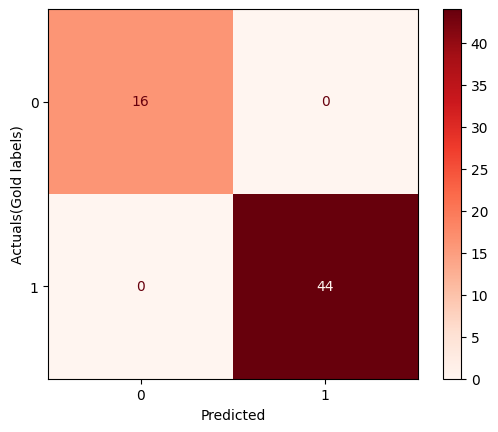

In [577]:
print('Confusion Matrix: \n', confusion_matrix(y_pred,y_test))
cm = confusion_matrix(y_pred, y_test, labels= logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logr.classes_)
disp.plot(cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actuals(Gold labels)')
# Plot and show confusion matrix.

Looking at the Confusion matrix, diagonal values show that the model has 100% accuracy. This means model is likely to have higher precision and recall.

In [578]:
print('Accuracy score:', accuracy_score(y_pred, y_test)*100)
# Print accuracy.

Accuracy score: 100.0


In [579]:
print('Classification Report: \n', classification_report(y_pred,y_test))
# Print classification report to show precision, recall, f1 score.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        44

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [580]:
df_copy = pd.read_csv('Iris.csv')
df_copy.head()
# Copied data set and loaded to complete Optional task.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [581]:
X_COPY = df_copy['PetalWidthCm']
y_copy = df_copy['Species']
# Assign X and y values

In [582]:
df_copy['Species'] = LabelEncoder().fit_transform(df_copy['Species'])
# Scale the data using label encoder.

In [583]:
print (df_copy['Species'].head())
print (df_copy['Species'].tail())
# Show top and end values to see scaler implementation.


0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32
145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int32


In [584]:
X_COPY = np.reshape(X_COPY, (-1, 1))
# Reshape X.

In [585]:
X_COPY.shape, y_copy.shape
# Show shape of X and y.

((150, 1), (150,))

In [586]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_COPY, 
                y_copy, test_size = 0.4, random_state = 0)
# Split data into train and test.

In [587]:
logr_copy = LogisticRegression()
logr_copy.fit(X_train_c,y_train_c)
# Fit a model.

LogisticRegression()

In [588]:
print('Intercept:', logr_copy.intercept_)
print('Coefficient:', logr_copy.coef_)
# Print intercept and coefficient.

Intercept: [ 3.85164672  0.86408407 -4.71573078]
Coefficient: [[-3.54887886]
 [ 0.09198318]
 [ 3.45689568]]


In [589]:
y_pred_copy = logr_copy.predict(X_test_c)
y_pred_copy
# Make predictions on test data.

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolo

Confusion Matrix: 
 [[16  0  0]
 [ 0 23  3]
 [ 0  0 18]]


Text(0, 0.5, 'Gold labels')

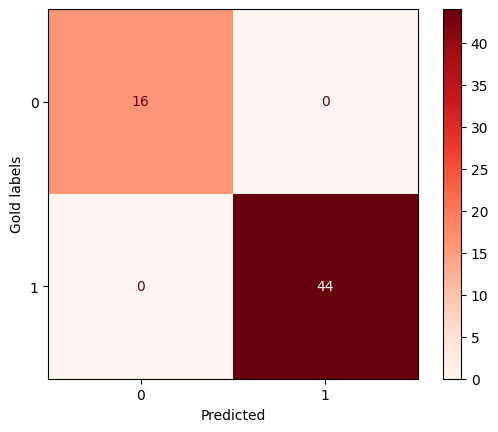

In [590]:
print('Confusion Matrix: \n', confusion_matrix(y_pred_copy,y_test_c))
cm_1 = confusion_matrix(y_pred_copy, y_test_c, labels= logr_copy.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logr_copy.classes_)
disp.plot(cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Gold labels')
# Show confusion matrix.

After updating the encoder values to 0, 1, 2 the Confusion matrix changes to three diagonal values and show that model has 95% accuracy. This means model is likely to have less higher precision and recall compare to previous logistic model.

In [591]:
print('Accuracy score:', accuracy_score(y_pred_copy, y_test_c)*100)
# Print accuracy.


Accuracy score: 95.0


In [592]:

print('Classification Report: \n', classification_report(y_pred_copy,y_test_c))
# Print classification report to show precision, recall, f1 score.

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.88      0.94        26
 Iris-virginica       0.86      1.00      0.92        18

       accuracy                           0.95        60
      macro avg       0.95      0.96      0.95        60
   weighted avg       0.96      0.95      0.95        60

